
# 📊 A/B Testing: Optimizing Ad Bidding

**Objective**: Evaluate whether a new ad bidding strategy improves key performance metrics compared to the existing one.

**Hypothesis**: The test group is expected to have higher purchase rate, click-through rate, and earnings per impression.

**Dataset**: Contains impression, click, purchase, and earnings data for both control and test groups.



## 📐 Metric Definitions

| Metric | Formula | Description |
|--------|---------|-------------|
|  **Purchase Rate** | Purchases / Impressions | Measures how often impressions convert to purchases |
|  **Click-Through Rate (CTR)** | Clicks / Impressions | Indicates user engagement with the ad |
|  **Earnings per Impression (EPI)** | Earnings / Impressions | Tracks revenue efficiency per ad impression |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_control = pd.read_csv('control_group.csv')
df_test = pd.read_csv('test_group.csv')
print('Control Group \n',df_control.head())
print('\n')
print('Test Group \n',df_test.head())

Control Group 
    Impression  Click  Purchase  Earning
0       82529   6090       665     2311
1       98050   3383       315     1743
2       82696   4168       458     1798
3      109914   4911       487     1696
4      108458   5988       441     1544


Test Group 
    Impression  Click  Purchase  Earning
0      120104   3217       702     1940
1      134776   3635       834     2929
2      107807   3057       423     2526
3      116445   4650       429     2281
4      145083   5201       750     2782


In [ ]:
print('Control Group Info \n')
print(df_control.info())
print('\n')
print('Test Group Info \n')
print(df_test.info())

Control Group Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
None


Test Group Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
None


In [ ]:
df_control.isnull().sum()

,0
Impression,0
Click,0
Purchase,0
Earning,0


In [ ]:
df_test.isnull().sum()

,0
Impression,0
Click,0
Purchase,0
Earning,0


In [ ]:
df_control.duplicated().sum()

np.int64(0)

In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
df_control.columns

Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')

In [ ]:
df_control_cat = df_control[['Impression', 'Click', 'Purchase', 'Earning']]
df_control_cat.nunique()

,0
Impression,39
Click,40
Purchase,37
Earning,39


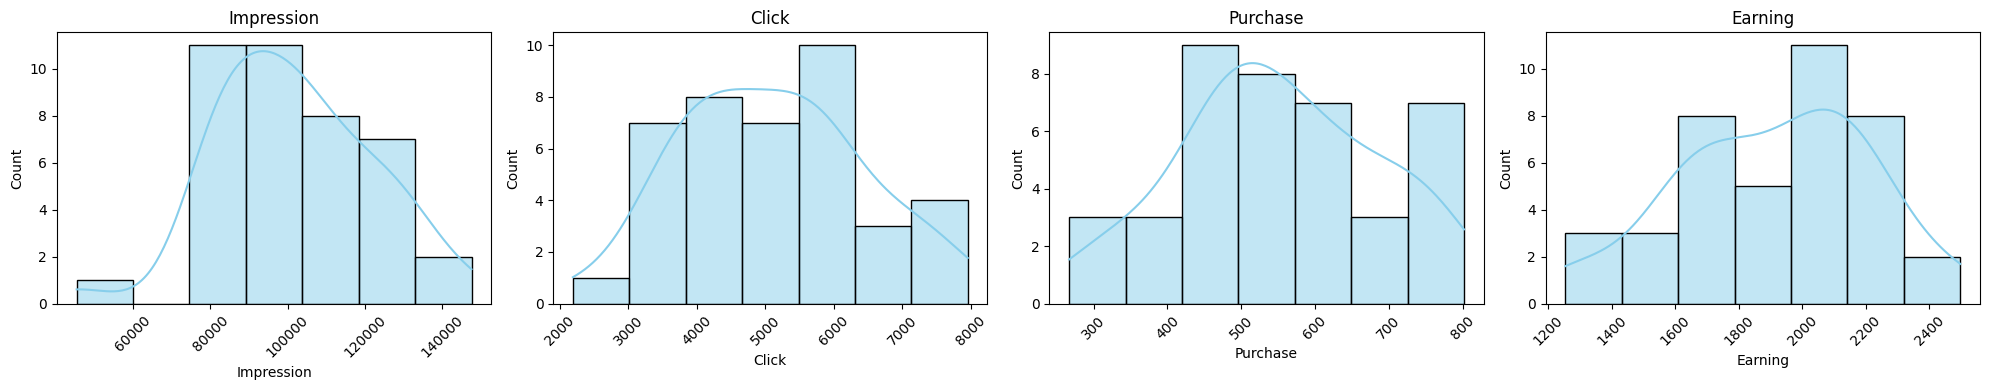

In [ ]:
numeric_cols = df_control.select_dtypes(include='number').columns

plt.figure(figsize=(5 * len(numeric_cols), 4))

for i, variable in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(x=variable, data=df_control_cat, kde=True, color='skyblue', edgecolor='black')
    plt.title(variable)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
main_metric = 'Purchase'
driver_metric = 'Click'
safety_metric = [['Impression','Earning']]


In [ ]:
randomized_unit_control = len(df_control)
randomized_unit_test = len(df_test)

40
40


In [ ]:
baseline_converstion_rate = df_control[main_metric].sum()/df_control['Impression'].sum()
print(baseline_converstion_rate)

0.005416302687652177


In [ ]:
mde = 0.01
alpha = 0.05
power = 0.80

In [ ]:
power_analysis = NormalIndPower()
effect_size = mde / np.sqrt(baseline_converstion_rate  * (1 -baseline_converstion_rate ))
n_per_group = power_analysis.solve_power(
    effect_size=effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1,
    alternative='two-sided'
)
sample_size = int(np.ceil(n_per_group))

846


In [ ]:
avg_imp_randomized_unit_control = df_control['Impression'].mean()
avg_imp_randomized_unit_test    = df_test['Impression'].mean()
duration_of_control   = sample_size / avg_imp_randomized_unit_control
duration_of_test      = sample_size / avg_imp_randomized_unit_test

In [ ]:
print('Randomized Unit for Control Group:',randomized_unit_control)
print('Randomized Unit for Test Group:',randomized_unit_test)
print("Sample Size: ", sample_size)
print("Average Impressions in Control: ", avg_imp_randomized_unit_control)
print("Average Impressions in Test: ", avg_imp_randomized_unit_test)
print("Duration of Control in Days: ", round(duration_of_control))
print("Duration of Test in Days : ", round(duration_of_test))


Randomized Unit for Control Group: 40
Randomized Unit for Test Group: 40
Sample Size:  846
Average Impressions in Control:  101711.45
Average Impressions in Test:  120512.425
Duration of Control in Days:  0
Duration of Test in Days :  0


In [ ]:
count = np.array([df_control['Purchase'].sum(), df_test['Purchase'].sum()])
nobs  = np.array([df_control['Impression'].sum(), df_test['Impression'].sum()])
z_pr, p_pr = proportions_ztest(count, nobs)
ci_c_pr, ci_t_pr = proportion_confint(count[0], nobs[0]), proportion_confint(count[1], nobs[1])

In [ ]:
count_ctr = np.array([df_control['Click'].sum(), df_test['Click'].sum()])
z_ctr, p_ctr = proportions_ztest(count_ctr, nobs)
ci_c_ctr, ci_t_ctr = proportion_confint(count_ctr[0], nobs[0]), proportion_confint(count_ctr[1], nobs[1])

In [ ]:
epi_control = df_control['Earning'] / df_control['Impression']
epi_test    = df_test['Earning']    / df_test['Impression']
t_epi, p_epi = ttest_ind(epi_control, epi_test, equal_var=False)
ci_c_epi = np.percentile(epi_control, [2.5, 97.5])
ci_t_epi = np.percentile(epi_test,    [2.5, 97.5])

In [ ]:
print("Purchase Rate Test")
print("z:",z_pr,"p: ",p_pr)
print("CI Control:",ci_c_pr,"CI Test:",ci_t_pr)
print("\n")
print("Click Rate Test")
print("z:",z_ctr,"p: ",p_ctr)
print("CI Control:",ci_c_ctr,"CI Test:",ci_t_ctr)
print("\n")
print("Earning Per Impression Test")
print("t:",t_epi,"p: ",p_epi)
print("CI Control:",ci_c_epi,"CI Test:",ci_t_epi)

Purchase Rate Test
z: 12.232379854771155 p:  2.087321934700134e-34
CI Control: (0.0053449836779779925, 0.005487621697326361) CI Test: (0.004767903213839255, 0.004891681679585635)


Click Rate Test
z: 129.3283262976726 p:  0.0
CI Control: (0.04993591794745217, 0.05036006642795493) CI Test: (0.03276304525262912, 0.03308161765246137)


Earning Per Impression Test
t: -1.890283586128312 p:  0.06246994327644144
CI Control: [0.01235294 0.02807457] CI Test: [0.01549398 0.03050733]


# **INSIGHTS**

# **1. Purchase Rate Test**

**Interpretation:**

- The control group has a higher purchase rate than the test group.
- The difference is very statistically significant (p ≪ 0.05).
- Even the confidence intervals don’t overlap, which supports this.

**The change in the test group reduced the purchase rate significantly. From a business perspective, the control version performs better in driving purchases.**

# **2. Click Rate Test**

**Interpretation:**
- The control group also has a much higher click rate than the test group.
- Confidence intervals are again non-overlapping, confirming significance.
- Very high z-score suggests a large sample size and a real effect.

**The test group significantly underperforms on click-through rate. Control is better at engaging users via clicks.**

# **3.  Earnings Per Impression (EPI)**
**Interpretation:**
- The test group appears to have slightly higher EPI, but this is not statistically significant at the 0.05 level (p = 0.062).
- The confidence intervals overlap, which supports this.

**There's a possible small increase in earnings per impression with the test version, but we can't confidently say it's not due to chance. This result is on the edge and might warrant further investigation with more data.**


# **Final Recommendation**

The test group significantly underperformed the control group on both purchase rate and click-through rate. Although earnings per impression were slightly higher, the difference was not statistically significant.

**Conclusion**:  Do not implement the test variant. The current control strategy yields better user engagement and conversions.
